BASIC Linear Regression project on California Housing data

In [5]:
# Set up necessary Libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Importing California housing data
df =pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [6]:
# Summary stats of the columsn
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [68]:
# 17k data points and 9 columns
df.shape

(17000, 9)

In [80]:
print("We have", len(df.columns), "Columns and ", len(df), "rows in this data. Columns names are: ")
df.columns

We have 9 Columns and  17000 rows in this data. Columns names are: 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.691871
total_rooms,0.130991
housing_median_age,0.106758
households,0.061031
total_bedrooms,0.045783
population,-0.027850
longitude,-0.044982
latitude,-0.144917


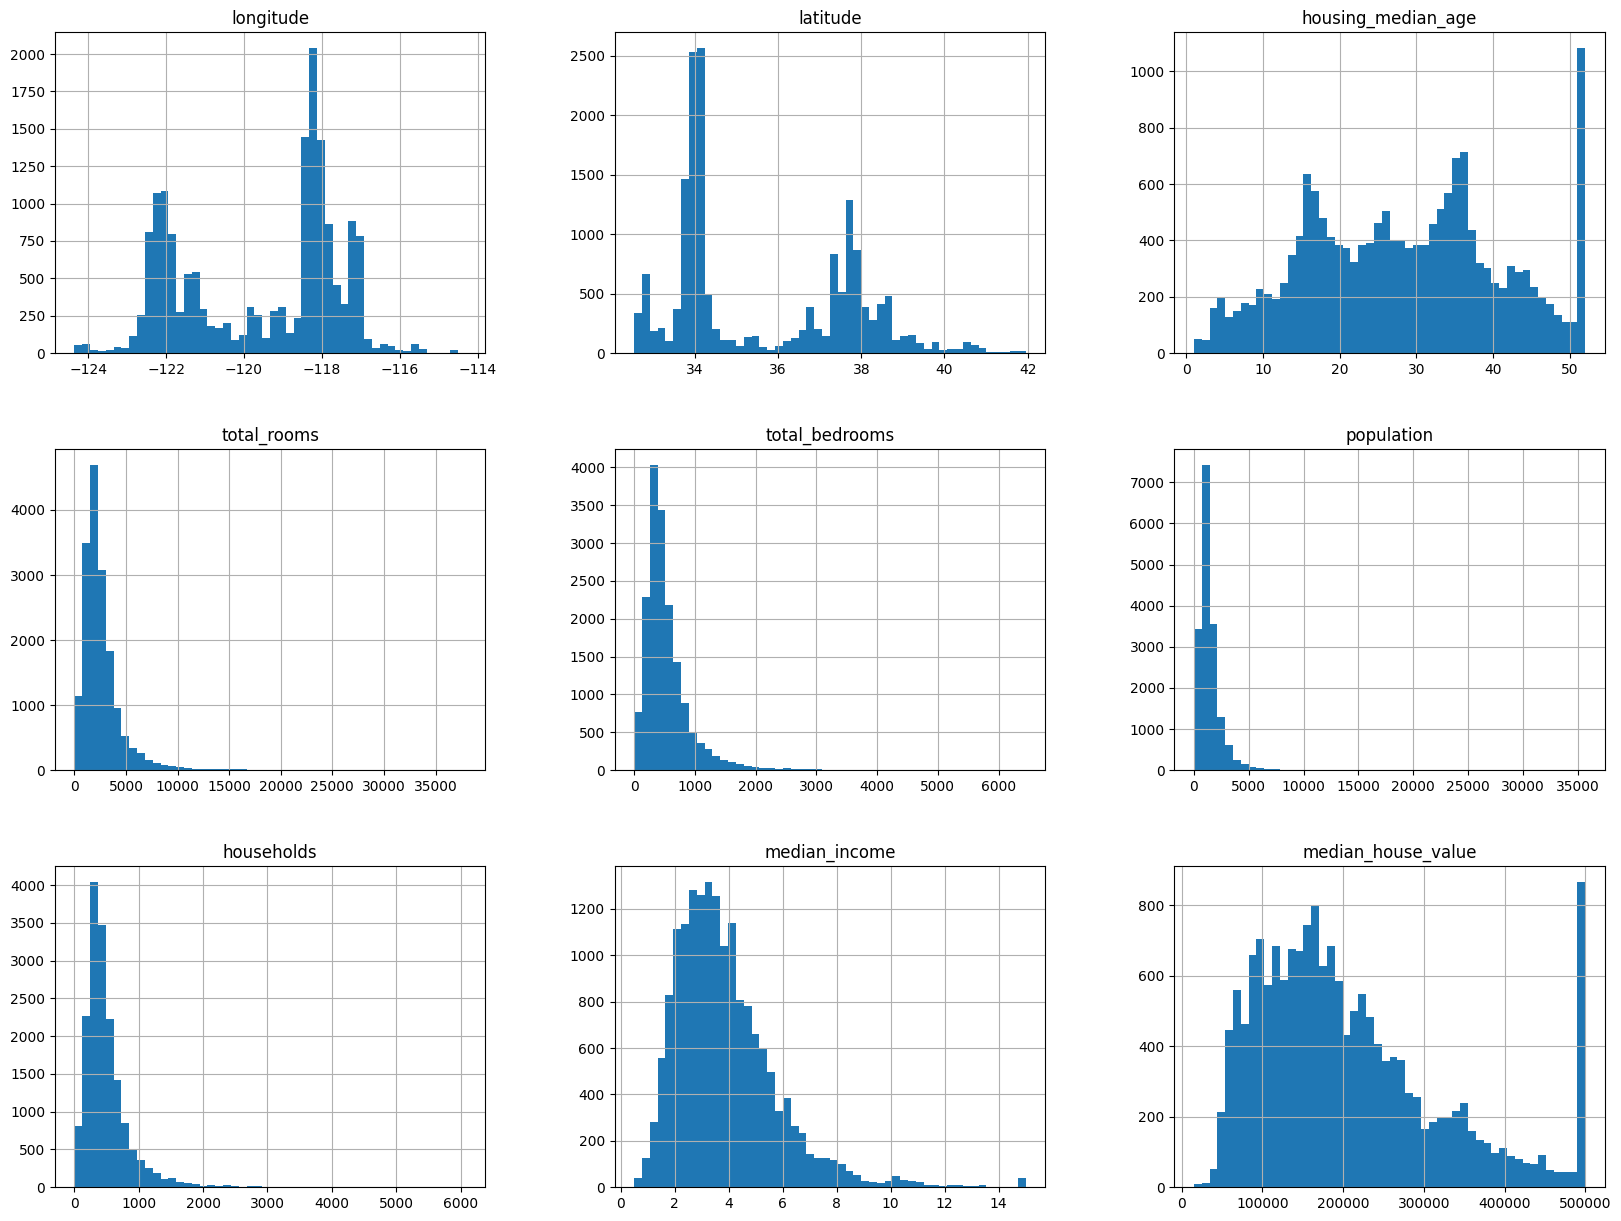

In [14]:
#creating distribution plots on dataset
%matplotlib inline
housing = df
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

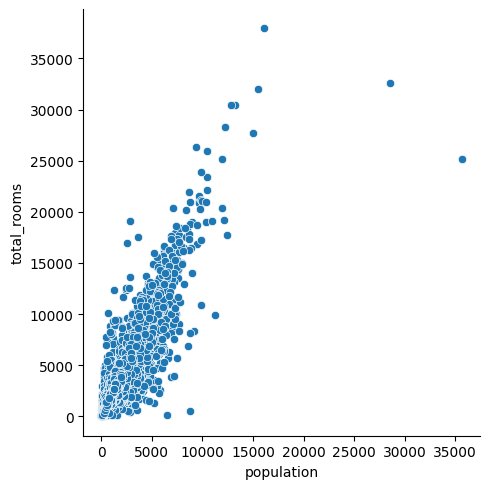

In [50]:
import seaborn as sns
sns.relplot(data=housing, x="population", y="total_rooms")


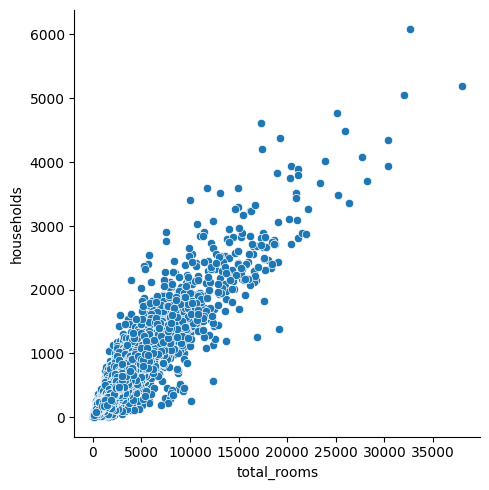

In [58]:
sns.relplot(data=housing, x="total_rooms", y="households")

In [62]:
## picking TWO numeric columns for Linear regression test

x = np.array(df['households']).reshape((-1, 1))
y = np.array(df['total_bedrooms'])

In [63]:
# call the model and Fit the data
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [64]:
# Calculate Rsquare to see how well a model fits data
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

coefficient of determination: 0.9622042277095031
intercept: 0.47030599067568346
slope: [1.07525324]


In [11]:
# Find slope( the change in y as x changes, if y is dependent of x) and Intercept( the value of y when x is equal to zero)
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print(f"intercept: {new_model.intercept_}")

print(f"slope: {new_model.coef_}")

intercept: [0.47030599]
slope: [[1.07525324]]


In [12]:
# Predicting the response
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[507.98983652 498.31255734 126.27493538 ... 490.78578464 514.44135598
 290.78868151]


In [13]:
# Another way to predict the response for the same result

y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[507.98983652]
 [498.31255734]
 [126.27493538]
 ...
 [490.78578464]
 [514.44135598]
 [290.78868151]]
